## Practice Final Exam Questions

### Warm-up Questions

1.)

Print the number of elements in the RDD B

Print the first five elements of RDD B

In [81]:
n=10000;
B=sc.parallelize(range(n))

## Your answer here
print B.count()
B.take(5)

10000


[0, 1, 2, 3, 4]

2.) 

Given an RDD of words, find and output one of the longest words

In [5]:
words=['this','is','the','best','mac','ever','jupyter']
wordRDD=sc.parallelize(words)

## Your answer here
wordRDD.reduce(lambda x, y: x if len(x) > len(y) else y)

'jupyter'

3.)

Remove duplicate elements in RDD

In [63]:
DuplicateRDD = sc.parallelize([1,1,2,2,3,3])

## Your answer here
print DuplicateRDD.distinct().collect()  # if want to print, collect()
print DuplicateRDD.map(lambda x: (x, None)).reduceByKey(lambda x, y: None).keys().collect()

[2, 1, 3]
[2, 1, 3]


4.)

Given an RDD, create a new RDD where each element appears twice

In [12]:
A=sc.parallelize(range(5))
A.flatMap(lambda x: (x, x)).collect()  # []

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]

5.)

Count how many positive numbers are there in the RDD?

In [80]:
B=sc.parallelize(range(-10,20))

## Your answer here
B.filter(lambda x: x > 0).count()

19

### Pair RDD Questions

6.)

Compute and print the largest value for each key in this pair RDD

In [15]:
PairRDD = sc.parallelize([(1,2), (2,4), (2,6)])

## Your answer here
PairRDD.reduceByKey(lambda x, y: x if x > y else y).collect()

[(2, 6), (1, 2)]

7.)

Sort a pair RDD by key and print the result

In [16]:
PairRDD = sc.parallelize([(2,2),(1,4),(3,6),(2,1)])

## Your answer here
PairRDD.sortByKey().collect()

[(1, 4), (2, 2), (2, 1), (3, 6)]

8.)

Perform the following transformation:

Original RDD : `[(1, 2), (2, 4), (2, 6)]`

After transformation :  `[(2, [4, 6]), (1, [2])]`

In [18]:
## Your answer here
rdd = sc.parallelize([(1, 2), (2, 4), (2, 6)])
rdd.groupByKey().mapValues(lambda x: sorted(x)).collect()

[(2, [4, 6]), (1, [2])]

9.)

Given two pair RDDs A and B, create the following RDD

`[('adam', ('kalai', None)),
 ('vaclav', (None, 'M')),
 ('john', ('dow', 'M')),
 ('beth', ('simon', 'F'))]`

In [23]:
A=sc.parallelize([('john','dow'),('adam','kalai'),('beth','simon')])
B=sc.parallelize([('beth','F'),('john','M'),('vaclav','M')])

## Your answer here
A.fullOuterJoin(B).collect()

[('adam', ('kalai', None)),
 ('vaclav', (None, 'M')),
 ('john', ('dow', 'M')),
 ('beth', ('simon', 'F'))]

### Statistics Questions

10.)

Suppose X is an RDD where each element is a floating point value. Write code to **efficiently** compute a good **approximation** of the median value?

In [2]:
from numpy.random import rand
X = sc.parallelize(rand(10000000)/2)

## Your answer here
# smaple to approximate 
XS = X.sample(False, 0.001)
n = XS.count()
sorted(XS.collect())[n/2]

0.25085343788727937

11.)

For the same RDD in Q-10, compute the mean and the standard deviation.

In [3]:
## Your answer here
XS.mean()

0.25197431323977248

In [4]:
XS.reduce(lambda x, y: x+y) / float(XS.count())

0.25197431323977221

In [76]:
print XS.variance()**0.5
print XS.stdev()

0.144443897983
0.144443897983


In [5]:
mu = XS.reduce(lambda x, y: x+y) / float(XS.count())
var = XS.map(lambda x: (x-mu)**2).reduce(lambda x, y: x+y)/float(XS.count())
var**0.5

0.14386233907718526

# In one pass 
$$
Var(X) = E(X^2)-E(X)E(X)
$$

In [11]:
import math
r = XS.map(lambda x: (1, x, x*x)).reduce(lambda a, b: (a[0]+b[0], a[1]+b[1], a[2]+b[2]))

print r[1]/r[0], math.sqrt(r[2]/r[0]-(r[1]/r[0])**2)

0.25197431324 0.143862339077


In [12]:
# for vector operator 
import numpy as np
r = XS.map(lambda x: np.array((1, x, x*x))).reduce(lambda a, b: a+b)

print r[1]/r[0], math.sqrt(r[2]/r[0]-(r[1]/r[0])**2)

0.25197431324 0.143862339077


12.) 

Suppose R is an RDD of tuples, each tuple containing two floating point numbers $(x,y)$. Compute the covariance of $x$ and $y$ using a single pass over the RDD.

The covariance equation:
$$
cov(X, Y) = E[XY] - E[X]E[Y]
$$

In [13]:
n = 10000
a = rand(n); b = rand(n)
R = sc.parallelize(zip(5*a+b,5*a-b))

## Your answer here
E = R.map(lambda (x, y): (x*y/n, x/n, y/n)).reduce(lambda (a, b, c), (x, y, z): (a+x, b+y, c+z))
E[0] - E[1]*E[2]

2.0040041960451473

In [15]:
n, x, y, xy = R.map(lambda (x, y): np.array((1, x, y, x*y))).reduce(lambda a, b: a+b)
xy/n - (x/n)*(y/n)

2.0040041960451909

13.)

Suppose R is an RDD that contains integer numbers in the range 0 to 3. Write code to efficiently compute and plot an **approximate** histogram.

Sample rule of thumb: $n$ data points, sample $\sqrt{n}$ points. 

In [16]:
X = ([0]*10000+[1]*23000+[2]*15532+[3]*10000)
# X = ([0]*10+[1]*23+[2]*15+[3]*10)
# randomize the X by sorting 
keys = rand(len(X))
R = sc.parallelize(zip(keys, X)).cache()
R = R.repartitionAndSortWithinPartitions(2).map(lambda x: x[1]) 

## Your answer here
# X = X.sample(False, 0.1)  # sample to approximate 
R.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x+y).collect()

[(0, 10000), (2, 15532), (1, 23000), (3, 10000)]

(array([ 103.,    0.,    0.,  196.,    0.,    0.,  161.,    0.,    0.,  112.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

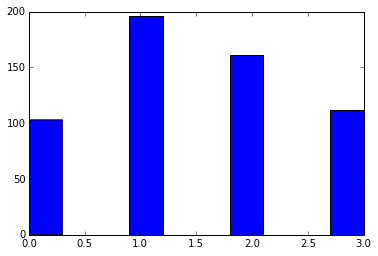

In [26]:
%matplotlib inline  
# or %pylab inline, without prefix pyplot. 
RS = R.sample(False, 0.01).collect()
pyplot.hist(RS)